In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
from folium.plugins import BeautifyIcon

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

In [2]:
total_data = pd.read_csv('total_data.csv', encoding='cp949')
data = total_data[(total_data['분기']=='2023 3Q') & (total_data['전용면적구간']==2)].drop_duplicates('도로명주소')
data.shape

(13196, 63)

In [3]:
ms_data = pd.read_csv('data/raw_data/ms_data.csv', encoding='cp949')

In [4]:
ms_data.sort_values('평균', ascending=False)

,학교명,위도,경도,평균,졸업자수
1954,충남 동영중학교,36.400907,126.766250,100.0,2
2295,전남 영흥중학교,34.805175,126.416647,99.6,199
2293,전남 목포홍일중학교,34.801717,126.374662,99.5,138
2614,경북 진성중학교,36.533149,129.033979,99.1,25
547,대구 상서중학교,35.846464,128.551190,98.9,114
...,...,...,...,...,...
2780,경남 원동중학교,35.300000,128.900000,27.8,9
2233,전남 고흥과역중학교,34.675670,127.357903,25.0,13
454,부산 덕문중학교,35.051894,128.829974,23.8,5
2192,전북 이평중학교,35.662731,126.811456,20.3,27


In [5]:
ms_data['졸업자수'].describe()

count    2958.000000
mean      131.203178
std        94.160256
min         1.000000
25%        49.250000
50%       125.000000
75%       190.000000
max       483.000000
Name: 졸업자수, dtype: float64

In [6]:
ms_data = ms_data[ms_data['졸업자수']>=50]
ms_data.shape

(2218, 5)

In [7]:
data['도'] = data['도로명주소'].apply(lambda x: x.split()[0])
data['시군'] = data['도로명주소'].apply(lambda x: ' '+x.split()[1] if x.split()[1].endswith(('시','군','구')) else '')
data['구'] = data['도로명주소'].apply(lambda x: ' '+x.split()[2] if x.split()[2].endswith('구') else '')
data['지역'] = data['도'] + data['시군'] + data['구']

In [8]:
ms_data['도'] = ms_data['학교명'].apply(lambda x: x.split()[0])

In [9]:
ms_data['도'] = ms_data['도'].replace(
    {'충북':'충청북','충남':'충청남','전북':'전라북','전남':'전라남','경북':'경상북','경남':'경상남'}
    ).apply(
    lambda x: x+'시' if x in [x[:-1] for x in data['도'].unique() if x.endswith('시')] else x+'도')

In [10]:
ms_data.groupby('도')['평균'].agg(['min','max','mean','std']).sort_values('mean', ascending=False)

,min,max,mean,std
도,,,,
울산시,70.5,97.9,85.969643,6.872420
대구시,51.7,98.9,84.657798,7.532046
부산시,59.3,93.3,81.149007,6.965016
대전시,56.9,98.8,79.805333,9.816091
세종시,58.0,94.6,78.576923,10.566547
서울시,49.5,97.6,77.956764,9.932494
충청북도,54.2,98.3,77.208219,8.431089
경상북도,49.6,96.6,77.185833,8.328641
제주도,56.2,91.1,76.909091,7.896216


In [11]:
ac_data = pd.read_csv('data/academy.csv', usecols=[1,3,4,5]).dropna()

In [12]:
ac_data.columns=['학원가이름']+ac_data.columns.to_list()[1:]

In [13]:
ac_data

,학원가이름,도로명 주소,lon,lat
0,서울특별시양천구(목동),서울 양천구 오목로 342,126.875355,37.524450
1,서울특별시양천구(신정동),서울 양천구 목동동로 165,126.869938,37.520542
2,서울특별시강남구(대치동),서울 강남구 도곡로 438,127.058426,37.497830
3,대구광역시수성구(만촌동),대구 수성구 달구벌대로 2584,128.645386,35.858588
4,대구광역시수성구(범어동),대구 수성구 달구벌대로 2500,128.636123,35.858418
5,경기도안양시동안구(평촌동),경기 안양시 동안구 평촌대로 123,126.959672,37.383006
6,경기도안양시동안구(호계동),경기 안양시 동안구 경수대로 538,126.958308,37.370864
7,경기도부천시(상동),경기 부천시 길주로 104,126.753187,37.505810
8,경기도부천시(중동),경기 부천시 길주로 314,126.776499,37.502972
9,부산광역시해운대구(우동),부산 해운대구 마린시티3로 1,129.147548,35.157860


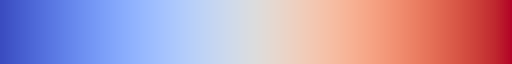

In [14]:
def color(*x): return '#'+''.join(map(lambda x: hex(int(x*255))[2:].zfill(2), x[:3]))
cmap = sns.color_palette("coolwarm", as_cmap=True)
cmap

In [15]:
def ms_map(ms_data, zoom_start=7, tiles='cartodbpositron', ms_opacity=.5, ac_opacity=.5):
    map = folium.Map(location=ms_data[['위도','경도']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = ms_data['평균'].median(), ms_data['평균'].std()
    for name,lat,lon,price in ms_data[['학교명','위도','경도','평균']].values:
        folium.CircleMarker(
            location=(lat,lon), 
            fill=True, 
            radius=2,
            opacity=ms_opacity,
            color=color(*cmap(int(96+(price-avg_p)/std_p*255))),
            tooltip=name
            ).add_to(map)
    for name,lat,lon in ac_data[['학원가이름', 'lat', 'lon']].values: 
        folium.Marker(
            location=(lat,lon), 
            tooltip=name,
            opacity=ac_opacity,
            icon=BeautifyIcon(
                icon='star',
                inner_icon_style='color:green;',
                background_color='transparent',
                border_color='transparent')
            ).add_to(map)
    return map

In [16]:
ms_map(ms_data[ms_data['도']=='서울시'], zoom_start=11)

In [17]:
ms_map(ms_data[ms_data['도']=='경기도'], zoom_start=9)

미사강변중학교, 성포중학교, 위례한빛중학교 좌표 수정 필요

In [18]:
ms_map(ms_data[ms_data['도']=='대구시'], zoom_start=9)

In [19]:
ms_map(ms_data[ms_data['도']=='부산시'], zoom_start=9)

In [20]:
ms_map(ms_data[ms_data['도']=='대전시'], zoom_start=9)

대전노은중학교 좌표 수정 필요

In [21]:
ms_map(ms_data[ms_data['도']=='제주도'], zoom_start=10)

In [22]:
ms_map(ms_data[ms_data['도']=='강원도'], zoom_start=9)

In [23]:
ms_map(ms_data[ms_data['도'].isin(['충청남도','세종시','대전시'])], zoom_start=8)

In [24]:
ms_map(ms_data[ms_data['도'].isin(['전라북도','광주시'])], zoom_start=8)